# Comparing Reddit Comment Scores Based on Religious Text

This is a graph looking at the avereage comment score on Reddit for comments that mention words associated with Republicans, Democrats, or general politics. In general, comments with political words have a lower score than average.

In [2]:
import pandas as pd
pos = pd.read_csv('C:/Users/Pablo/Desktop/DataIncubator/Reddit Data Set/comments_positive.csv')
neg = pd.read_csv('C:/Users/Pablo/Desktop/DataIncubator/Reddit Data Set/comments_negative.csv')
pos =  pos.sample(n=50000, random_state=12)
neg =  neg.sample(n=50000, random_state=12)
total = pd.concat([pos,neg])
total = total.dropna()

In [3]:
#Look at politics too
Republican_text = ('Donald|Trump|DonaldTrump|Pence|Romney|Reagan|Gop|Polanski|Republican|conservative|Mccain')
Democrat_text = ('Clinton|Hillary|Sanders|Yang|Bernie|Sanders|Biden|Obama|Barack|Democrat|Pelosi|Huckabee')
Politics_text = ('politic|politics|president|government|political|state|politicion|vote|law|governor|court|supreme|justice|police|federal|office|impeach|political party|dictator|legal|illegal|lobby')


total['Republican_text'] = total['text'].str.contains(Republican_text, case = False)
total['Democrat_text'] = total['text'].str.contains(Democrat_text, case = False)
total['Politics_text'] = total['text'].str.contains(Politics_text, case = False)

total['Politics_text'].sum()
total['Republican_text'].sum()
total['Democrat_text'].sum()
total.groupby('Republican_text')['score'].mean()
total.groupby('Democrat_text')['score'].mean()
total.groupby('Politics_text')['score'].mean()


"""Going to add a couple bar graphs to compare comment scores"""

a = total.groupby('Republican_text')['score'].mean()[True]
b = total.groupby('Democrat_text')['score'].mean()[True]
c = total.groupby('Politics_text')['score'].mean()[True]
d = total['score'].mean()
data = (a, b, c, d)


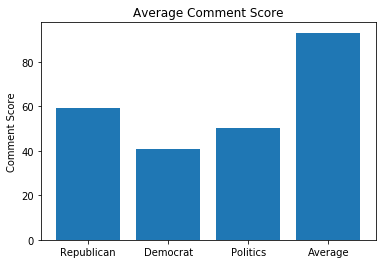

In [6]:
import matplotlib.pyplot as plt
ax = plt.bar(('Republican','Democrat','Politics','Average'), data)
plt.ylabel('Comment Score')
plt.title('Average Comment Score')
plt.show()

